In [1]:
""" Python で動かして学ぶ! あたらしい 機械学習の 教科書
p.171 5.2 2次元入力の面モデル """

# リスト 5-2-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データのロード -----
data = np.load("ch5_data.npz")
X0 = data["X"] # これまでの X を X0 とする
N = data["N"]
T = data["T"]

# 2次元データ生成 -----
np.random.seed(seed=1)  # 乱数を固定
X1 = 23 * (T / 100) ** 2 + 2 * np.random.randn(N)  # X1 を生成
X0_min, X0_max = 5, 30                             # X0 の下限と上限（表示用）
X1_min, X1_max = 40, 75                            # X1 の下限と上限（表示用）

In [2]:
# リスト 5-2-(2)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


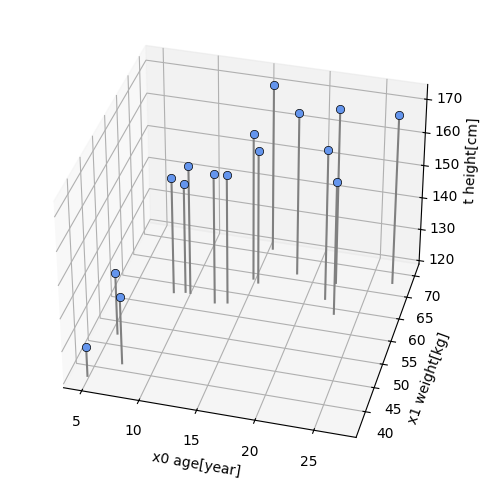

In [3]:
# リスト 5-2-(3)
# 2次元データの表示 -----
def show_data2d(ax, x0, x1, t): # ax は 3d グラフ描画のため
    for i in range(len(x0)):
        ax.plot(                # データの点の下の直線の描画
            [x0[i], x0[i]],     # 直線の両端の x 座標
            [x1[i], x1[i]],     # 直線の両端の y 座標
            [120, t[i]],        # 直線の両端の z 座標
            color="gray",
        )

    ax.plot(                    # データ点の描画
        x0,                     # x 座標
        x1,                     # y 座標
        t,                      # z 座標
        "cornflowerblue",       # 色
        marker="o",             # マーカーの形状
        linestyle="None",       # 点をつなげる線は描かない
        markeredgecolor="black",# マーカーの輪郭の色
        markersize=6,           # マーカーのサイズ
        markeredgewidth=0.5,    # マーカーの輪郭線の太さ
    )
    ax.view_init(elev=35, azim=-75)  # グラフの向きの指定
    ax.set_xlabel("x0 age[year]")
    ax.set_ylabel("x1 weight[kg]")
    ax.set_zlabel("t height[cm]")

# メイン -----
plt.figure(figsize=(6, 6))
ax = plt.subplot(projection="3d")
show_data2d(ax, X0, X1, T)
plt.show()

SD = 12.88 cm


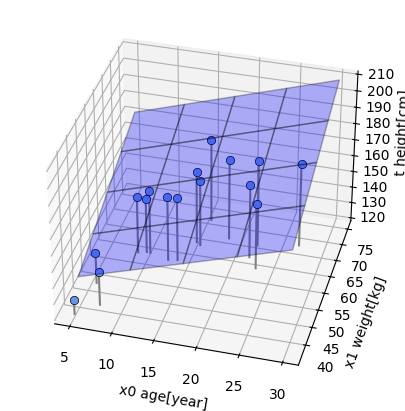

In [6]:
# リスト 5-2-(4)
# 面の表示 -----
def show_plane(ax, w):
    # 表示データの計算
    x0_n, x1_n = 5, 5
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)          # グリッド座標の作成
    y = w[0] * xx0 + w[1] * xx1 + w[2]      # 式 5-28
    # サーフェイス表示
    ax.plot_surface(
        xx0, xx1, y,
        rstride=1, cstride=1, alpha=0.3, color="blue", edgecolor="black",
    )

# 面の平均二乗誤差(MSE)関数 -----
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]        # 式 5-28
    mse = np.mean((y - t) ** 2)
    return mse

# メイン -----
w = np.array([1.5, 1, 90])
mse = mse_plane(X0, X1, T, w)               # MSE を計算
# 結果表示
print(F"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 -----
plt.figure(figsize=(6, 5))
ax = plt.subplot(projection="3d")
show_plane(ax, w)
show_data2d(ax, X0, X1, T)
plt.show()

w0 = 0.46, w1 = 1.09, w2 = 89.05
SD = 2.55 cm


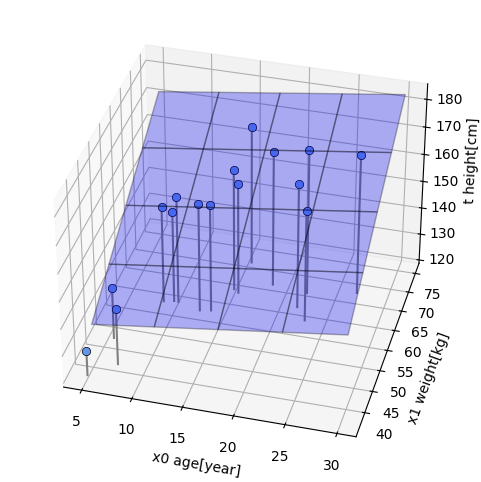

In [9]:
# リスト 5-2-(5)
# 解析解 -----
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)      # cov(t, x0)、t と x0 の共分散
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)      # cov(t, x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)   # cov(x0, x1)
    v_x0 = np.var(x0)                                       # var(x0)、x0 の分散
    v_x1 = np.var(x1)                                       # var(x1)
    # 式 5-34
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1 ** 2 - v_x0 * v_x1)
    # 式 5-35
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1 ** 2 - v_x0 * v_x1)
    # 式 5-36
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    w = np.array([w0, w1, w2])
    return w

# メイン -----
w = fit_plane(X0, X1, T)      # w を計算
mse = mse_plane(X0, X1, T, w) # MSE を計算
# 結果表示
print(F"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(F"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 -----
plt.figure(figsize=(6, 6))
ax = plt.subplot(projection="3d")
show_plane(ax, w)
show_data2d(ax, X0, X1, T)
plt.show()